In [ ]:
# Import both data fetch and mechanical data processing modules
from data_fetch import main as fetch_data_main
from process_mechanical_data import main as process_mechanical_main



════════════════════════════════════════════════════════════════════════════════
EvoNEST Data Fetch - Python
════════════════════════════════════════════════════════════════════════════════

╔══════════════════════════════════════════════════════════════════════════════╗
║                       EvoNEST Data Fetch Configuration                       ║
╚══════════════════════════════════════════════════════════════════════════════╝

════════════════════════════════════════════════════════════════════════════════

┌─ API Credentials ───────────────────────────────────────────────────────────


Enter API key (format: evo_xxxxx):  evo_7yuhddCX3oKKqxw8mfhuufZ8SjN3jEaF
Enter database name [supersilk]:  supersilk



════════════════════════════════════════════════════════════════════════════════


Configure advanced fetch options? [y/N]:  N



✅ Using default fetch options

────────────────────────────────────────────────────────────────────────────────


Save this configuration for future use? [Y/n]:  Y


✅ Configuration saved to E:\Documents\Work\Developer\EvoNEST-data-science\config\evonest_config.json

════════════════════════════════════════════════════════════════════════════════
✅ EvoNEST Client initialized for database: supersilk

FETCHING SAMPLES

📊 Fetching samples from EvoNEST API...
✅ Successfully retrieved 5 samples

💾 Data saved to 'E:\Documents\Work\Developer\EvoNEST-data-science\downloaded_data\samples_data.json'

FETCHING TRAITS

📊 Fetching traits from EvoNEST API...
✅ Successfully retrieved 7 traits

💾 Data saved to 'E:\Documents\Work\Developer\EvoNEST-data-science\downloaded_data\traits_data.json'

FETCHING EXPERIMENTS

📊 Fetching experiments from EvoNEST API...
✅ Successfully retrieved 2 experiments

💾 Data saved to 'E:\Documents\Work\Developer\EvoNEST-data-science\downloaded_data\experiments_data.json'

✅ Data fetch complete!


# EvoNEST Data Science Pipeline - Interactive Notebook

This notebook provides a step-by-step interface for inexperienced researchers to:
1. **Fetch data** from the EvoNEST API
2. **Process mechanical data** and fit polynomial models to stress-strain curves
3. **Build analysis tables** from downloaded and processed data
4. **Analyze outliers** using hierarchical sigma-based detection

**Instructions**: Simply run each cell in order by pressing `Shift+Enter`. The scripts will guide you through configuration when needed.

## Section 1: Fetch EvoNEST Data

Run the cell below to fetch samples, traits, and experiments from the EvoNEST API. This will:
- Prompt you to configure API credentials and fetch options
- Download data to `downloaded_data/` folder


In [ ]:
# Run data fetch
fetch_data_main()


## Section 2: Process Mechanical Data

Run the cell below to process mechanical test data and fit polynomial models to stress-strain curves. This will:
- Prompt you to configure fracture detection and polynomial fitting parameters
- Process all experiments in `downloaded_data/experiments_data.json`
- Generate polynomial coefficients and save results to `processed_data/fit_data.json`
- Optionally save plots showing fitted curves


In [ ]:
# Run mechanical data processing
process_mechanical_main()


## Section 3: Build Data Analysis Tables

Run the cell below to load downloaded and processed data into pandas DataFrames for analysis.

This will create three tables:
- **samples_df**: Sample metadata (animals, silk samples, taxonomy, location)
- **traits_df**: Trait measurements (diameter, mechanical properties, morphology)
- **experiments_df**: Processed experiment results with polynomial fits

The script will display summary statistics for each table.

In [2]:
# Run the data analysis table building script
from analyse_data import main as analyse_data_main

# This will load data and create the three DataFrames
result = analyse_data_main()

# Extract the dataframes for use in subsequent cells
samples_df = result[0]
traits_df = result[1]
experiments_df = result[2]

print("\n✅ DataFrames are now available for analysis:")
print(f"   - samples_df: {samples_df.shape}")
print(f"   - traits_df: {traits_df.shape}")
print(f"   - experiments_df: {experiments_df.shape}")


════════════════════════════════════════════════════════════════════════════════
EvoNEST Data Analysis - Building Data Tables
════════════════════════════════════════════════════════════════════════════════

📂 Loading data files...
  ✓ Loaded 4596 samples
  ✓ Loaded 7978 traits
  ✓ Loaded 732 experiments

🔨 Building samples table...
  ✓ Samples DataFrame: 4596 rows × 40 columns
  Sample types:
    - silk: 3161
    - animal: 1410
    - artificial: 25

🔨 Building traits table...
  ✓ Traits DataFrame: 7978 rows × 68 columns
  Trait types: 12 unique types
  Top trait types:
    - diameter: 1982
    - cross-section: 1921
    - modulus: 737
    - strainAtBreak: 736
    - toughness: 736

🔨 Building experiments table...
  ✓ Experiments DataFrame: 732 rows × 20 columns

DATA SUMMARY

📊 SAMPLES
  Total samples: 4596
  Sample types:
    - silk: 3161
    - animal: 1410
    - artificial: 25
  Families represented: 75

🔬 TRAITS
  Total traits: 7978
  Trait types: 12 unique types

⚗️ EXPERIMENTS
  T

### 3.1 Explore Samples Table

View and explore the samples DataFrame created in the previous step.

In [3]:
# Display samples table information
print(f"Samples DataFrame shape: {samples_df.shape}")
print(f"\nSample types distribution:")
if 'type' in samples_df.columns:
    print(samples_df['type'].value_counts())

print(f"\nFirst few rows:")
samples_df.head()

Samples DataFrame shape: (4596, 40)

Sample types distribution:
type
silk          3161
animal        1410
artificial      25
Name: count, dtype: int64

First few rows:


,_id,location,family,genus,species,nomenclature,file,latitude,longitude,tag,...,molted,lifestage,filesId,preservationDate,collection,box,slot,silktype,extractionfailed,preservationNotes
0,66268c7be5c28e102c68bd51,"Botanischer Garten, Greifswald, Germany",Pholcidae,Pholcus,phalangioides,Pholcus phalangioides,,54.093648,13.367107,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,66268c7be5c28e102c68bd52,"Botanischer Garten, Greifswald, Germany",Pholcidae,Pholcus,phalangioides,Pholcus phalangioides,,54.093648,13.367107,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,66268c7be5c28e102c68bd53,"Loitzer Str. 26, Greifswald, Germany",Pholcidae,Pholcus,phalangioides,Pholcus phalangioides,,54.091976,13.363476,dragline,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,66268c7be5c28e102c68bd54,"Loitzer Str. 26, Greifswald, Germany",Pholcidae,Pholcus,phalangioides,Pholcus phalangioides,,54.091976,13.363476,dragline,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,66268c7be5c28e102c68bd55,"Loitzer Str. 26, Greifswald, Germany",Pholcidae,Pholcus,phalangioides,Pholcus phalangioides,,54.091976,13.363476,dragline,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### 3.2 Explore Traits Table

View and explore the traits DataFrame.

In [4]:
# Display traits table information
print(f"Traits DataFrame shape: {traits_df.shape}")
print(f"\nTrait types distribution (top 10):")
if 'type' in traits_df.columns:
    print(traits_df['type'].value_counts().head(10))

print(f"\nFirst few rows:")
traits_df.head()

Traits DataFrame shape: (7978, 68)

Trait types distribution (top 10):
type
diameter             1982
cross-section        1921
modulus               737
strainAtBreak         736
toughness             736
stressAtBreak         736
loadAtBreak           731
body_mass             217
cross-section-max      47
cross-section-min      47
Name: count, dtype: int64

First few rows:


,_id,file,samples_id,tag,date,listvals,measurement,nfibres,responsible,sampleId,...,method,filesId,experimentId,diameterConversion.oldDiameters,diameterConversion.newDiameters,diameterConversion.oldCrossSection,diameterConversion.newCrossSection,diameterConversion.ratio,diameterConversion.date,derivedFrom
0,66268c7be4d21d902bb2320d,/data/PhophaP11/PhophaP11_trait_SilkTrait_phph...,Phopha11_slide1,NaN,2023-05-16 17:30:20.662590,"[1.088, 1.401, 0.775, 1.32, 1.331, 1.485, 1.03...",1.195182,2,66268c7b8417913804c5b6cf,66268c7be5c28e102c68bd55,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,66268c7be4d21d902bb2320e,/data/PhophaP11/PhophaP11_trait_SilkTrait_phph...,Phopha11_slide2,NaN,2023-05-16 17:32:11.358653,"[1.086, 1.136, 1.36, 1.097]",1.16975,2,66268c7b8417913804c5b6cf,66268c7be5c28e102c68bd5c,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,66268c7be4d21d902bb2320f,/data/PhophaP17/PhophaP17_trait_SilkTrait_phph...,Phopha17bis_slide1,NaN,2023-05-16 17:34:41.956950,"[1.204, 0.862, 0.949, 0.994, 1.031, 0.995, 0.9...",0.9685,2,66268c7b8417913804c5b6cf,66268c7be5c28e102c68bd56,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,66268c7be4d21d902bb23210,/data/PhophaP9/PhophaP9_trait_SilkTrait_phph9_...,Phopha9_slide1,NaN,2023-05-18 15:52:04.856812,"[1.037, 0.864, 0.934, 0.955, 1.129, 0.787, 0.9...",0.9805,2,66268c7b8417913804c5b6cf,66268c7be5c28e102c68bd58,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,66268c7be4d21d902bb23211,/data/PhophaP9/PhophaP9_trait_SilkTrait_phph9_...,Phopha9_slide2,NaN,2023-05-18 15:53:43.314194,"[0.996, 1.273, 1.169, 1.029, 1.125, 1.273, 0.9...",1.090917,2,66268c7b8417913804c5b6cf,66268c7be5c28e102c68bd59,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### 3.3 Explore Experiments Table

View and explore the processed experiments DataFrame with polynomial fit data.

In [ ]:
# Display experiments table information
print(f"Experiments DataFrame shape: {experiments_df.shape}")
print(f"\nFit quality statistics:")
print(f"  Average R²: {experiments_df['r_squared'].mean():.4f}")
print(f"  Min R²: {experiments_df['r_squared'].min():.4f}")
print(f"  Max R²: {experiments_df['r_squared'].max():.4f}")
print(f"\nFracture detection:")
print(f"  Fractures detected: {experiments_df['fracture_detected'].sum()} / {len(experiments_df)}")

print(f"\nFirst few rows:")
experiments_df.head()

## Section 4: Analyze Outliers

This section performs hierarchical outlier analysis on the processed experimental data.
The analysis uses sigma-based detection (1σ, 2σ, 3σ) grouped by Family > Species > Subsample Type.

Configuration:
- **Outlier trait threshold**: Percentage of traits that must be outliers to flag an experiment
- **Sigma level**: Standard deviations threshold for outlier detection
- Results saved to `processed_data/outlier_analysis.json` and `processed_data/outlier_experiments.csv`

In [5]:
# Run outlier analysis
from analyse_outliers import main as analyse_outliers_main

# This will perform hierarchical outlier analysis and save results
analyse_outliers_main()

EvoNEST OUTLIER ANALYSIS

Configuration:
  Outlier trait threshold: 30%
  Sigma level: 2
  Output directory: processed_data

Loaded 732 experiments
Polynomial degree: 5

DataFrame created with 732 experiments
Columns: ['experiment_id', 'sample_name', 'family', 'genus', 'species', 'name', 'subsampletype', 'type', 'coeff_0', 'coeff_1', 'coeff_2', 'coeff_3', 'coeff_4', 'coeff_5', 'r_squared', 'trait_diameter', 'trait_strainAtBreak', 'trait_stressAtBreak', 'trait_toughness', 'trait_modulus', 'trait_loadAtBreak']

HIERARCHICAL STATISTICAL ANALYSIS OF TENSILE TEST DATA
Analyzing 13 traits: polynomial coefficients and measurements
Grouping by: Family > Species (name) > Subsample Type


Analyzing groups:  18%|█▊        | 22/121 [00:00<00:02, 47.22group/s]

⚠️  Warning: Could not compute statistics for column 'coeff_5': unsupported operand type(s) for +: 'float' and 'str'


Analyzing groups: 100%|██████████| 121/121 [00:02<00:00, 42.86group/s]



GROUP: Agelenidae > Eratigena sp. > dragline
Samples: 2

Outlier Summary:
  Traits with 1σ outliers: 0/13
  Traits with 2σ outliers: 0/13
  Traits with 3σ outliers: 0/13

GROUP: Agelenidae > Tegenaria parietina > walking
Samples: 3

Outlier Summary:
  Traits with 1σ outliers: 13/13
  Traits with 2σ outliers: 0/13
  Traits with 3σ outliers: 0/13

GROUP: Amaurobiidae > Amaurobius fenestralis > dragline
Samples: 2

Outlier Summary:
  Traits with 1σ outliers: 0/13
  Traits with 2σ outliers: 0/13
  Traits with 3σ outliers: 0/13

GROUP: Anyphaenidae > Anyphaena accentuata > dragline
Samples: 4

Outlier Summary:
  Traits with 1σ outliers: 11/13
  Traits with 2σ outliers: 0/13
  Traits with 3σ outliers: 0/13

GROUP: Araneidae > Cyrtophora citricola > manual collection
Samples: 6

Outlier Summary:
  Traits with 1σ outliers: 12/13
  Traits with 2σ outliers: 3/13
  Traits with 3σ outliers: 0/13

GROUP: Atracidae > Atrax robustus > dragline
Samples: 3

Outlier Summary:
  Traits with 1σ outliers: 

## Next Steps: Custom Analysis

Now that you have the three DataFrames loaded (`samples_df`, `traits_df`, `experiments_df`), you can perform custom analysis and create visualizations.

**Examples**:
- Explore relationships between traits and mechanical properties
- Create scatter plots comparing different measurements
- Filter data by family or species
- Analyze trends across different sample types

Use the cells below to write your own analysis code!


Traits DataFrame columns: ['_id', 'file', 'samples_id', 'tag', 'date', 'listvals', 'measurement', 'nfibres', 'responsible', 'sampleId', 'std', 'type', 'unit', 'equipment', 'detail', 'sample._id', 'sample.location', 'sample.family', 'sample.genus', 'sample.species', 'sample.nomenclature', 'sample.file', 'sample.latitude', 'sample.longitude', 'sample.tag', 'sample.notes', 'sample.secondaryItems', 'sample.name', 'sample.date', 'sample.parentId', 'sample.responsible', 'sample.recentChangeDate', 'sample.type', 'sample.subsampletype', 'sample.logbook', 'sample.recentTraitChangeDate', 'logbook', 'recentChangeDate', 'notes', 'silktype', 'sample.lat', 'sample.lon', 'sample.sex', 'sample.box', 'sample.slot', 'sample.silktype', 'sample.lifestatus', 'sample.lastFed', 'sample.fed', 'sample.preservationDate', 'sample.collection', 'sample.lifestage', 'sample.life_stage', 'sample.preservation', 'sample.filesId', 'sample.molted', 'sample.extractionfailed', 'sample.eggsac', 'method', 'filesId', 'experi

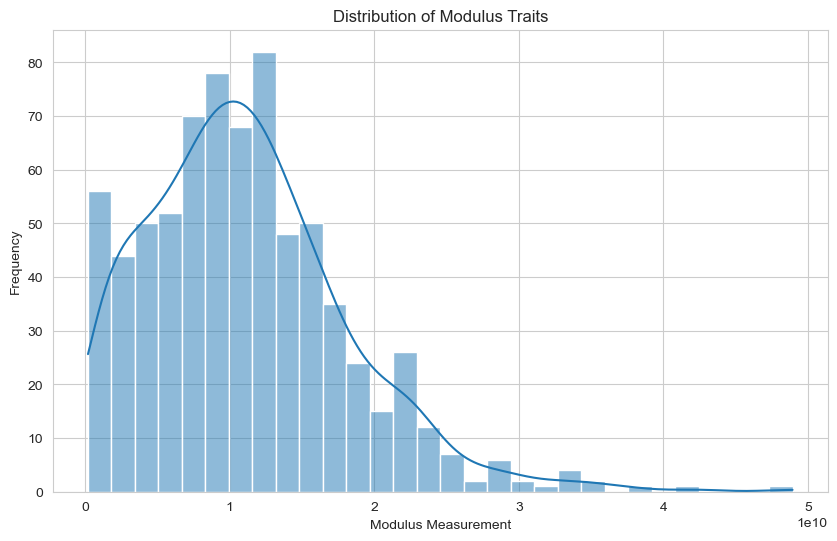

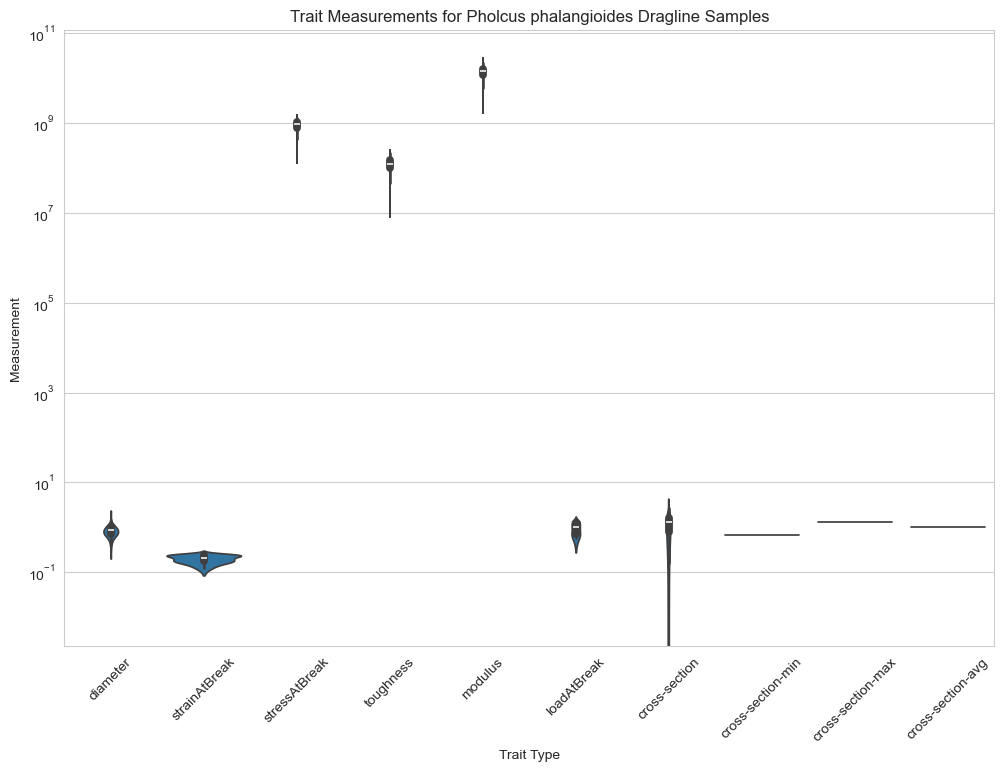

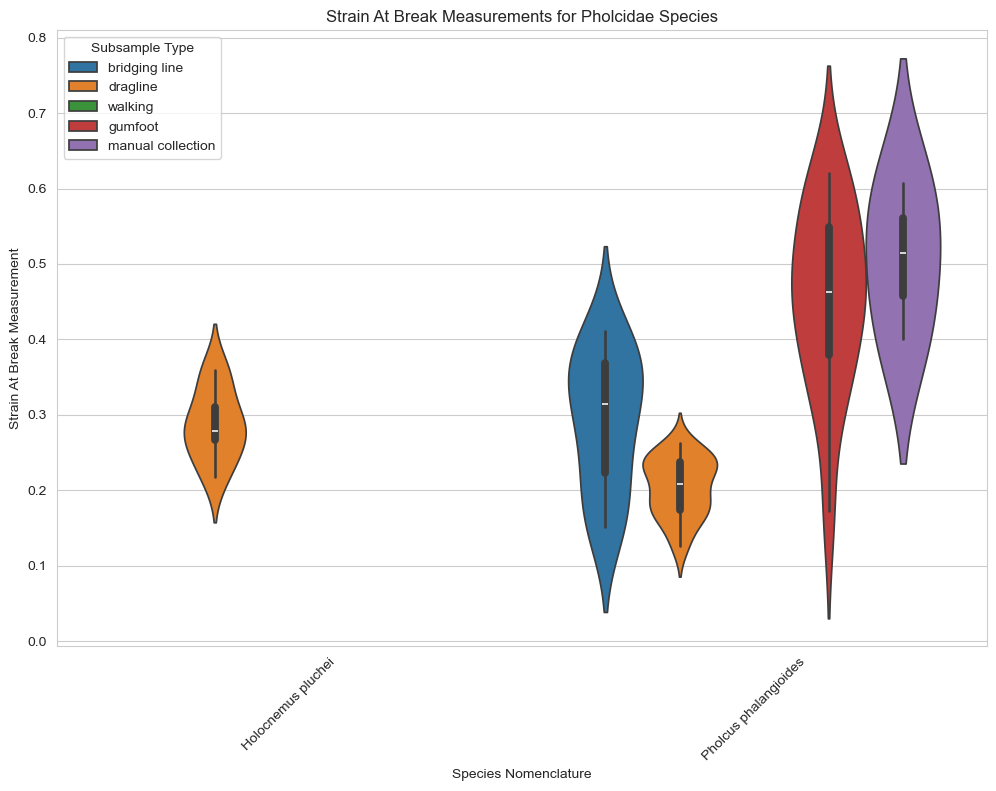

In [ ]:
# Example: Your custom analysis code here
# Import visualization libraries if needed
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot style
sns.set_style("whitegrid")

# print columns of traits
print(f"\nTraits DataFrame columns: {traits_df.columns.tolist()}")

# Make an histogram of traits of type 'modulus'
if 'type' in traits_df.columns and 'measurement' in traits_df.columns:
    modulus_traits = traits_df[traits_df['type'] == 'modulus']
    plt.figure(figsize=(10, 6))
    sns.histplot(modulus_traits['measurement'], bins=30, kde=True)
    plt.title('Distribution of Modulus Traits')
    plt.xlabel('Modulus Measurement')
    plt.ylabel('Frequency')
    plt.show()

# Make a violin plot for each trait type of samples with sample.nomenclature Pholcus phalangioides and sample.subsampletype 'dragline'
if 'sample.nomenclature' in traits_df.columns and 'sample.subsampletype' in traits_df.columns:
    pholcus_dragline = traits_df[(traits_df['sample.nomenclature'] == 'Pholcus phalangioides') &
                                   (traits_df['sample.subsampletype'] == 'dragline')]
    plt.figure(figsize=(12, 8))
    sns.violinplot(x='type', y='measurement', data=pholcus_dragline)
    plt.title('Trait Measurements for Pholcus phalangioides Dragline Samples')
    plt.xlabel('Trait Type')
    plt.ylabel('Measurement')
    plt.yscale('log')
    plt.xticks(rotation=45)
    plt.show()


In [ ]:

# Make a violin plot for each strainAtBreak of all species of the family Pholcidae and all subsample types
if 'sample.family' in traits_df.columns:
    data = traits_df[(traits_df['sample.family'] == 'Pholcidae') &
                                   (traits_df['type'] == 'strainAtBreak')]
    plt.figure(figsize=(12, 8))
    sns.violinplot(x='sample.nomenclature', y='measurement', hue='sample.subsampletype', data=data, split=False)
    plt.title('Strain At Break Measurements for Pholcidae Species')
    plt.xlabel('Species')
    plt.ylabel('Strain At Break Measurement')
    plt.xticks(rotation=45)
    plt.legend(title='Subsample Type')
    plt.show()

In [32]:
# Make a table showing a statistical summary of the column measurement and subsample types for each species in the family Pholcidae
if 'sample.family' in traits_df.columns:
    # Remove non-numeric columns for aggregation
    cols = "measurement"
    pholcidae_summary = traits_df[traits_df['sample.family'] == 'Pholcidae'].groupby(['sample.nomenclature', 'type', 'sample.subsampletype'])[cols].agg(['mean', 'std', 'min', 'max'])
    display(pholcidae_summary)


mean  \
sample.nomenclature   type              sample.subsampletype                        
Holocnemus pluchei    cross-section     dragline                          2.32003   
                      diameter          dragline                          0.88121   
                      loadAtBreak       dragline                         2.113333   
                      modulus           dragline                13723653477.42613   
                      strainAtBreak     dragline                            0.287   
                      stressAtBreak     dragline                1240412666.359501   
                      toughness         dragline                 214276188.035447   
Pholcus phalangioides cross-section     bridging line                    1.211814   
                                        dragline                         1.271856   
                                        eggsac                           0.827479   
                                        gumfoot                          1.355411   
                                        intercepted prey wrap            0.626984   
                                        manual collection                1.765179   
                                        prey wrap                         0.74043   
                                        tangle web                       0.464677   
                                        walking                          0.825296   
                      cross-section-avg dragline                         0.995833   
                                        gumfoot                          7.716462   
                      cross-section-max dragline                         1.327777   
                                        gumfoot                          9.259755   
                      cross-section-min dragline                         0.663888   
                                        gumfoot                           6.17317   
                      diameter          bridging line                    0.785675   
                                        dragline                         0.891481   
                                        eggsac                           0.964032   
                                        gumfoot                          0.791326   
                                        intercepted prey wrap            0.849193   
                                        manual collection                0.798707   
                                        prey wrap                        0.921172   
                                        tangle web                       0.715916   
                                        walking                          0.733779   
                      loadAtBreak       bridging line                    1.550364   
                                        dragline                         0.980885   
                                        gumfoot                              1.11   
                                        manual collection                   0.122   
                      modulus           bridging line           10394909090.90909   
                                        dragline               14088115384.615385   
                                        gumfoot                 8130456681.163692   
                                        manual collection            3990000000.0   
                      strainAtBreak     bridging line                    0.291364   
                                        dragline                            0.204   
                                        gumfoot                          0.453667   
                                        manual collection                0.507333   
                      stressAtBreak     bridging line            915605181.818182   
                                        dragline                 898791461.538462   
                                        gumfoot                  671308891.835825 